# Homework 3
## Network Analytics - BA 2019/2020
Team 7 - 22/03/20

### 1. Exercise 1

#### 1.1. Zachary Karate Club network

Let us see the community structure. First, we need to put the edge list into the graph format.

In [1]:
import pandas as pd
import networkx as nx
import community
import matplotlib.pyplot as plt
import numpy as np

fh=open("D:\\Johanna\\Ecole\\Imperial\\Network Analysis\\HW3\\zachary_karate_club.txt", 'rb')
G=nx.read_edgelist(fh)
fh.close()

Then, we will use the networkx $girvan\_newman$ algorithm with betweenness as centrality measure.

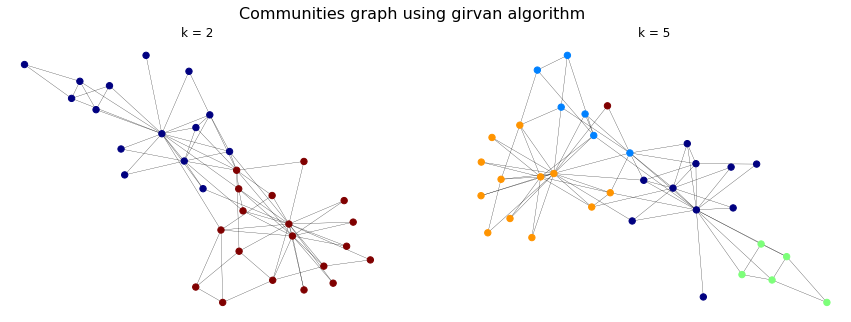

In [2]:
import itertools
def print_girvan_communities(G, l, k):
    comm = nx.algorithms.community.centrality.girvan_newman(G)
    fig, ax = plt.subplots(1, int((l-1)/k+1), figsize=(15,5), clear = True)
    #print(l, k, int((l-1)/k+1))
    fig.suptitle('Communities graph using girvan algorithm', fontsize=16)
    i = 0
    for c in itertools.islice(comm, l):
        if i%k == 0:
            part = tuple(sorted(n) for n in c)
            values = []
            for n in G.nodes:
                j = 0
                while j < len(part) and n not in part[j]:
                    j+=1
                values.append(j)
            #print(int((i)/k))
            nx.draw_spring(G, ax = ax[int((i/k))],cmap = plt.get_cmap('jet'), node_color = values, node_size=40, width = 0.25, with_labels=False)
            ax[int((i)/k)].set_title('k = '+str((2+i)))
            i += 1
        else :
            i +=1
print_girvan_communities(G, 6, 3)

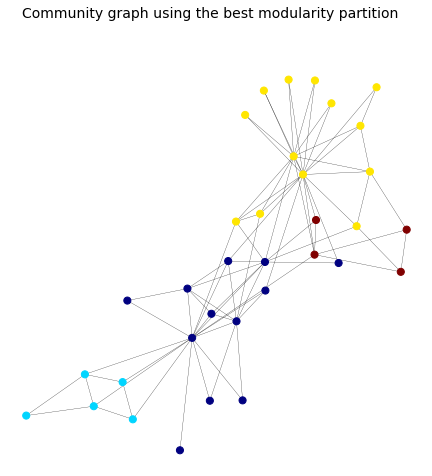

In [3]:
def print_best_partition(G):
    part = community.best_partition(G)
    values = [part.get(node) for node in G.nodes()]

    fig, ax = plt.subplots(1, 1, figsize=(7.5, 7.5), clear = True)
    fig.suptitle('Community graph using the best modularity partition', fontsize = 14)
    nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=50, width = 0.25, with_labels=False)

print_best_partition(G)

The squeleton of those functions are from https://stackoverflow.com/questions/43541376/how-to-draw-communities-with-networkx.

{0, 1, 2, 3}


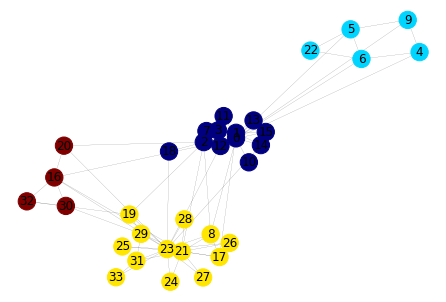

In [4]:
def community_layout(g, partition, cs, ns):
    pos_communities = _position_communities(g, partition, scale=cs)

    pos_nodes = _position_nodes(g, partition, scale=ns)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    print(communities)
    hypergraph = nx.Graph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj)

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

def test(G, cs, ns):
    from community import community_louvain

    
    part = community.best_partition(G)
    values = [part.get(node) for node in G.nodes()]
    pos = community_layout(G, part, cs, ns)
    nx.draw(G, pos, cmap = plt.get_cmap('jet'), node_color=values, width = 0.1, with_labels = True)
    
test(G, 3, 1)

#### 1.2. BA 2018/2019 network

Let us see the community structure. First, we need to put the adjacency list into the graph format.

In [5]:
#The "-" have been removed from the 2 datasets
sent = pd.read_csv("D:\\Johanna\\Ecole\\Imperial\\Network Analysis\\HW2\\HW2_who_talks_to_whom_same.csv")
sent.head()

1  2  3  4  5  6  7  8  9  10  ...  72  73  74  75  76  77  78  79  80  81
0  0  2  0  0  0  0  0  1  0   0  ...   0   0   0   0   0   3   4   0   4   2
1  0  0  0  0  3  0  3  0  0   0  ...   0   4   2   0   0   0   0   0   0   0
2  0  0  0  1  0  0  0  0  4   0  ...   2   0   0   0   2   0   5   0   2   1
3  0  1  1  0  0  0  0  0  2   4  ...   1   4   1   5   1   0   1   8   2   2
4  0  3  0  1  0  0  1  0  0   0  ...   0  12   3   0   0   3   0   0   0   0

[5 rows x 81 columns]

In [6]:
#Let us fill the NA with 0 and put everything into int format
sent = sent.fillna(0).astype(int)

same = [[0]*len(sent)]*len(sent)
for j in range(1, 2):
    for i in range(j, len(sent)):
        if max(sent.at[i, str(j)], sent.at[j, str(i)]) > 0 :
            #print(i, j, sent.at[i, str(j)], received.at[j, str(i)])
            same[i][j] = 1
            same[j][i] = 1
same = np.asmatrix(same)


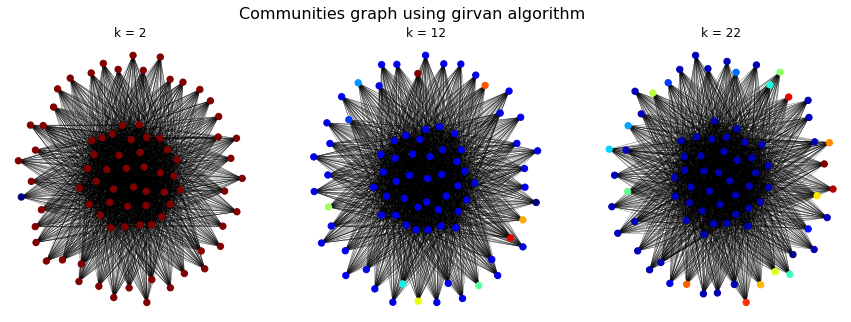

In [7]:
G2 = nx.from_numpy_matrix(same)
print_girvan_communities(G2, 30, 10)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}


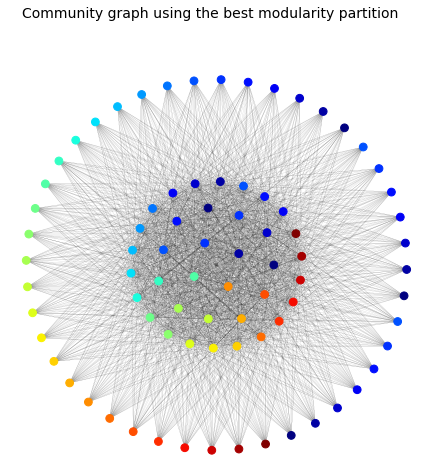

In [8]:
part = community.best_partition(G2)
values = [part.get(node) for node in G2.nodes()]
print(set(values))

fig, ax = plt.subplots(1, 1, figsize=(7.5, 7.5), clear = True)
fig.suptitle('Community graph using the best modularity partition', fontsize = 14)
nx.draw_kamada_kawai(G2, cmap = plt.get_cmap('jet'), node_color = values, node_size=60, width = 0.05, with_labels=False)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}


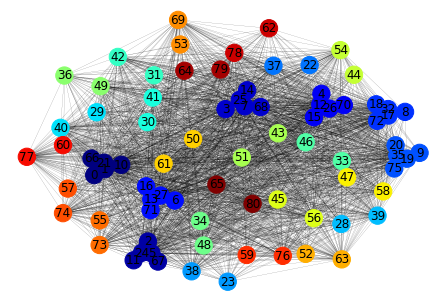

In [9]:
test(G2, 10, 1)

### 2. Exercise 2

The Bass model seen in class is pertinent for forecasting new adoption after a product introduction. 

From the "Forecasting adoption of a new product" article, we could find a similar explanation of this model. Only few notations are different. The number of new adopters during period t is called $F_t$ instead of $N_t$ and $S_t$ will be the actual value of new adopters during period t.

With this in mind, we will try to reproduce the results shown about $The Doctor$.

First, we will enter the data about box office revenues.

In [10]:
S_t = np.array([0.1, 3., 5.2, 7., 5.25, 4.90, 3., 2.4, 1.9, 1.3, 0.8, 0.6])
C_t = np.array([0, 0.1, 3.1, 8.3, 15.3, 20.55, 25.45, 28.45, 30.85, 32.75, 34.05, 34.85, 35.45])

print(S_t, C_t)

[0.1  3.   5.2  7.   5.25 4.9  3.   2.4  1.9  1.3  0.8  0.6 ] [ 0.    0.1   3.1   8.3  15.3  20.55 25.45 28.45 30.85 32.75 34.05 34.85
 35.45]


We could now resolve the following nonlinear problem.

$ min \sum_{t=1}^{12} (F_t - S_t)^2$

s.t.

$F_t = (p + q[C_{t-1}/m])(m-C_{t-1}), t = 1, ..., 12$

The variables are $m$, $p$ and $q$.

In [11]:
def residuals(x):
    res = 0
    for i in range(1, 13):
        f_t = (x[1]+x[2]*C_t[i-1]/x[0])*(x[0]-C_t[i-1])
        res += (f_t - S_t[i-1])**2
    return res

In [12]:
from scipy.optimize import minimize, Bounds

init = np.array([1., 0.25, 0.75])
bounds = Bounds([0, 0, 0], [40, 1, 1])

sol = minimize(residuals, init , method='Powell')
print(sol)

   direc: array([[ 2.41922453, -0.01552484, -0.01233278],
       [ 0.        ,  1.        ,  0.        ],
       [ 0.20854735,  0.00512169, -0.04794427]])
     fun: 14.496088781470124
 message: 'Optimization terminated successfully.'
    nfev: 183
     nit: 5
  status: 0
 success: True
       x: array([34.81438876,  0.07357111,  0.49288463])


In [13]:
sol = minimize(residuals, init , method='L-BFGS-B', bounds = bounds)
print(sol)

      fun: 14.496088749365173
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00000000e+00, -3.44613227e-05, -6.21724894e-06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 112
      nit: 24
   status: 0
  success: True
        x: array([34.81455553,  0.07357102,  0.49288183])


In [14]:
sol = minimize(residuals, init , method='TNC', bounds = bounds)
print(sol)

     fun: 14.49608875429472
     jac: array([7.37188088e-05, 6.78852530e-03, 2.30304664e-03])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 58
     nit: 17
  status: 1
 success: True
       x: array([34.81454461,  0.07357123,  0.49288588])


We observe that any of the 3 models could be used for solving the problem. Now, let us try to forecast the evolution of revenues with only the 4th first weeks.

In [15]:
def forecast(x):
    res = []
    C_t = [x[0]*(1-np.exp(-(x[1]+x[2])*i))/(1+x[2]/x[1]*np.exp(-(x[1]+x[2])*i)) for i in range(0, 12)]
    for i in range(1, 13):
        f_t = (x[1]+x[2]*C_t[i-1]/x[0])*(x[0]-C_t[i-1])
        res.append(f_t)
    return res

In [16]:
def residuals_forecast(x):
    res = 0
    for i in range(1, 5):
        f_t = (x[1]+x[2]*C_t[i-1]/x[0])*(x[0]-C_t[i-1])
        res += (f_t - S_t[i])**2
    return res

In [17]:
sol1 = minimize(residuals_forecast, init , method='Powell')
print(sol1.x)

[11.41579142  0.35070999  1.83197023]


In [18]:
sol2 = minimize(residuals_forecast, init , method='L-BFGS-B', bounds = bounds)
print(sol2.x)

[14.58987069  0.30378803  1.        ]


In [19]:
sol3 = minimize(residuals_forecast, init , method='TNC', bounds = bounds)
print(sol3.x)

[14.59019536  0.30377481  1.        ]


Let us show in a graph our 3 predictions and the actual revenues.

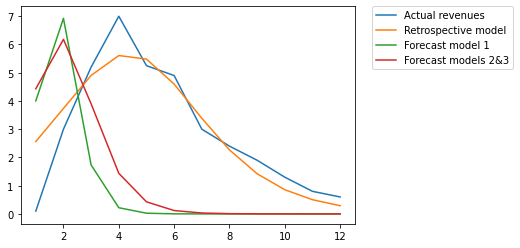

In [20]:
import matplotlib.pyplot as plt

X = [i for i in range(1, 13)]
Y1 = forecast(sol1.x)
Y2 = forecast(sol2.x)
#Y3 = forecast(sol3.x)
Y4 = forecast(sol.x)

plt.plot(X, S_t, label = "Actual revenues")
plt.plot(X, Y4, label = 'Retrospective model')
plt.plot(X, Y1, label = "Forecast model 1")
plt.plot(X, Y2, label = "Forecast models 2&3")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

It appears that any of the forecasting models are under evaluating the number of final adopters. Consequently, the peak arrives earlier and disappears faster in those scenario.

### 3. Exercise 3

If we know about investments in companies or projects, it is also possible for national or international banks to invest in the prosperity of other central banks. The risks involved in this way are assessed by means of exposure measurement.

In the years 2007-2008, a financial crisis shook the financial markets, redistributing the risks between the different states. Let's take a look at this development here.

In [21]:
financial_data = pd.read_csv('D:\\Johanna\\Ecole\\Imperial\\Network Analysis\\HW3\\hw3_pbm3_data.csv')
financial_data.head()

net_id from_id to_id    value
0  2004-12-31      AU    JP    14.42
1  2004-12-31      GB    JP   625.87
2  2004-12-31      GB    US  7696.25
3  2004-12-31      NL    JP   511.30
4  2004-12-31      US    JP   702.66

In [22]:
date = sorted(list(set(financial_data['net_id'])))
print(date)

['2004-12-31', '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31', '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31', '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31', '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31', '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31', '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31', '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31', '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31', '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31', '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31', '2017-03-31', '2017-06-30']


The following 2 functions are used to display networks between countries. For ease of understanding, the draw_graph function only takes into account the imbalance of exposure between different countries. The resulting graph is thus directed.

In [126]:
def create_network(G, positions):
    #Copy the graph do avoid to mess up with data
    H = G.copy()

    #Divide between positive and negative correlation
    #for st1, st2, weight in G.edges(data=True):   
    #    if weight["weight"] <25 :
    #        H.remove_edge(st1, st2)

        
    #Put into list format
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    weights = tuple(np.asarray(weights)/500)
    

    d = H.in_degree()
    indegree = list(d)
    outdegree = list(H.out_degree())
    
    #creates list of nodes and a list their degrees that will be used later for their sizes
    nodelist = []
    node_sizes = []
    for i in d:
        if i[1] > 0:
            nodelist.append(i[0])
            node_sizes.append(i[1])

    #Circular is better since every node is linked to every others
    if positions == []:
        positions=nx.circular_layout(H)
    
    #Use a large number to see clearly
    plt.figure(figsize=(15,15))

    #Use NetworkX to print nodes
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',nodelist=nodelist,
                           #####the node size will be now based on its degree
                           node_size=tuple([x**3 for x in node_sizes]),alpha=0.8)
    
    #Print labels
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')


    #Print the edges with the good color
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid',
                          ###adds width=weights and edge_color = weights 
                          ###so that edges are based on the weight parameter 
                          ###edge_cmap is for the color scale based on the weight
                          ### edge_vmin and edge_vmax assign the min and max weights for the width
                          width=weights, edge_color = weights,
                          edge_vmin = min(weights), edge_vmax=max(weights), alpha = 0.5)

    # displays the graph without axis
    plt.axis('off')
    plt.show()
    return positions

In [127]:
def draw_graph(d, positions):
    G = nx.DiGraph()

    dated = (financial_data[financial_data['net_id']==d].drop(columns = 'net_id'))
    
    for i in set(dated['from_id']):
        for_i = dated[dated['from_id'] == i]

        for j in set(dated['to_id']):

            for_j = dated[dated['from_id'] == j]
            if i != j:

                for_i_j = for_i[for_i['to_id'] == j]
                for_j = for_j[for_j['to_id'] == i]
                
                if not for_i_j.empty:
                    if not for_j.empty :
                        x = max(0, for_i_j['value'].iloc[0])
                        y = max(0, for_j['value'].iloc[0])
                        v = x - y

                        if v <= 0:
                            edge = [tuple([j, i, -v])]
                        else :
                            edge = [tuple([i, j, v])]
                        G.add_weighted_edges_from(edge)
                    else :
                        edge = [tuple([i, j, for_i_j['value'].iloc[0]])]
                        G.add_weighted_edges_from(edge)
    positions = create_network(G, positions)
    return G, positions

To try to understand the overall evolution, let's look at the state of the network every 10 months.

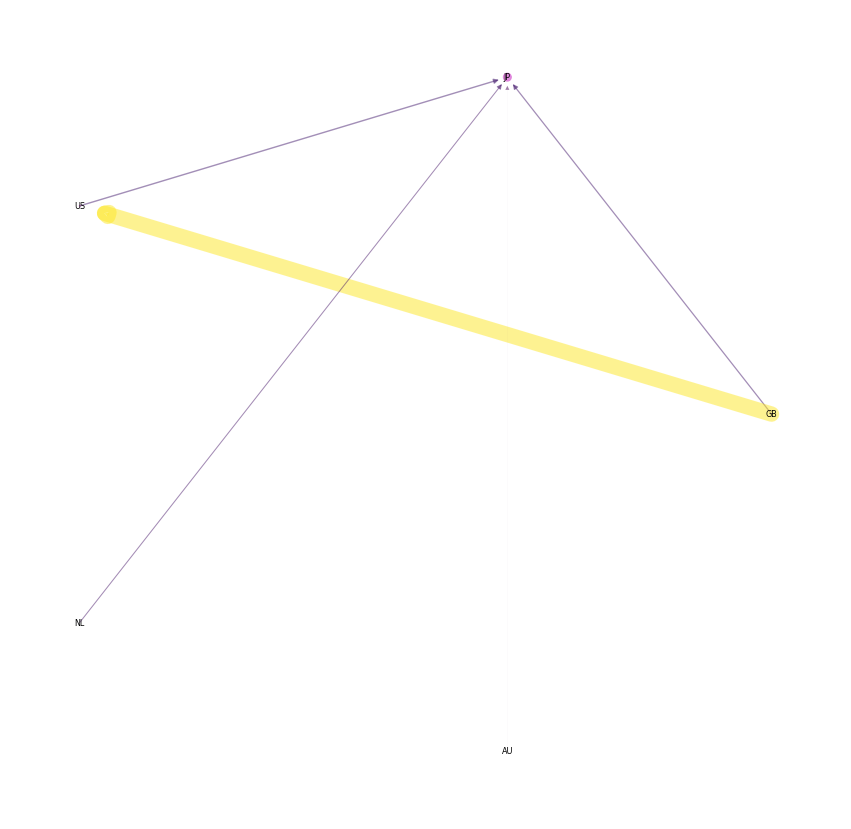

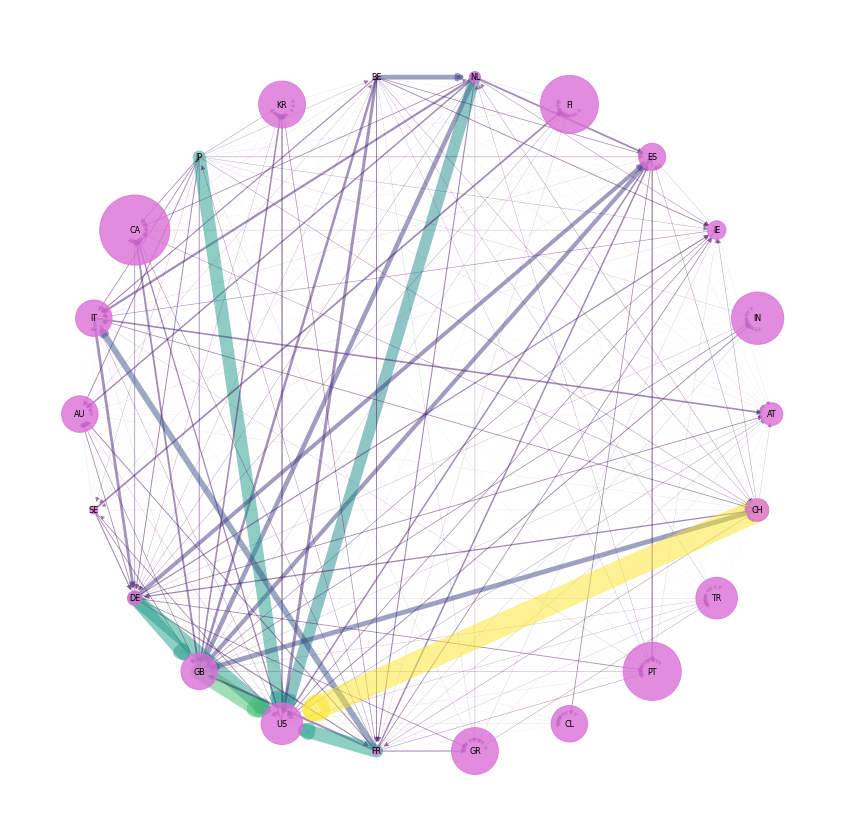

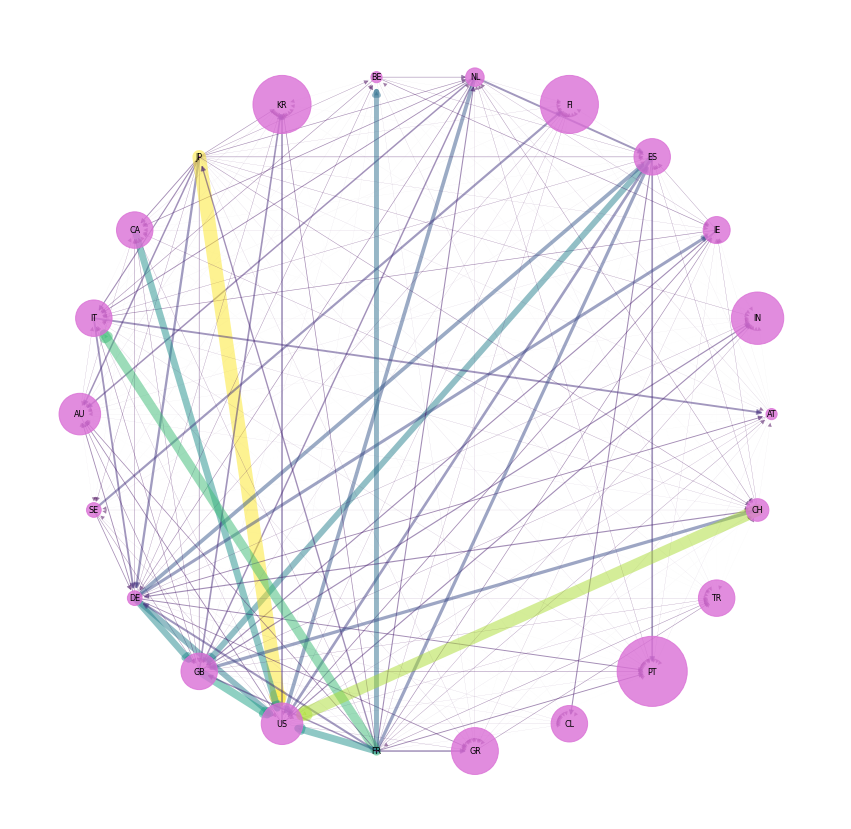

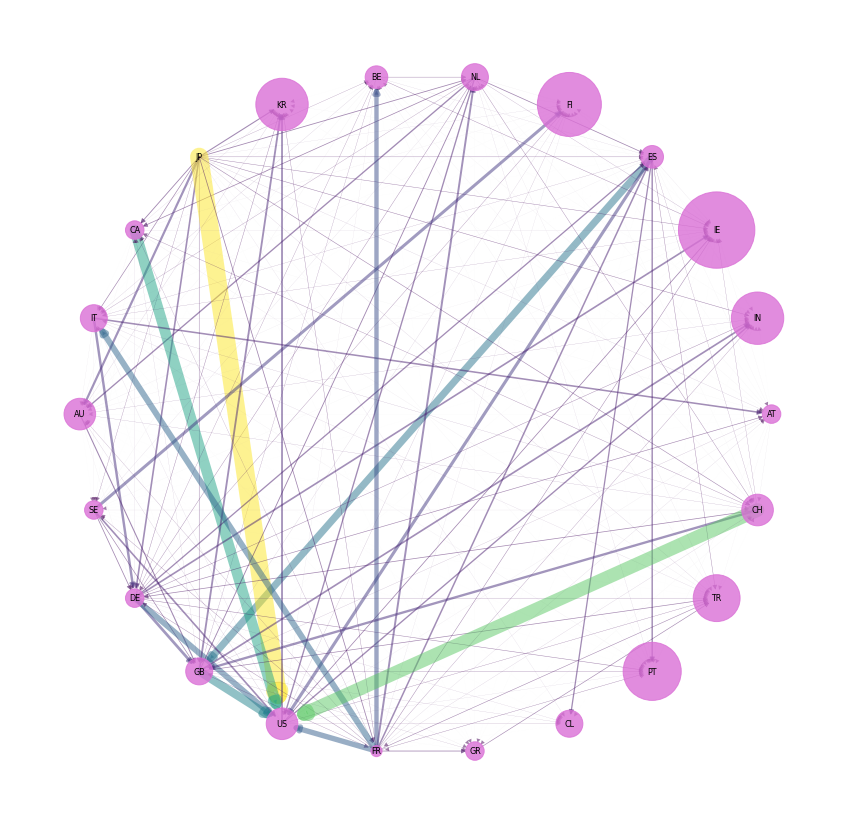

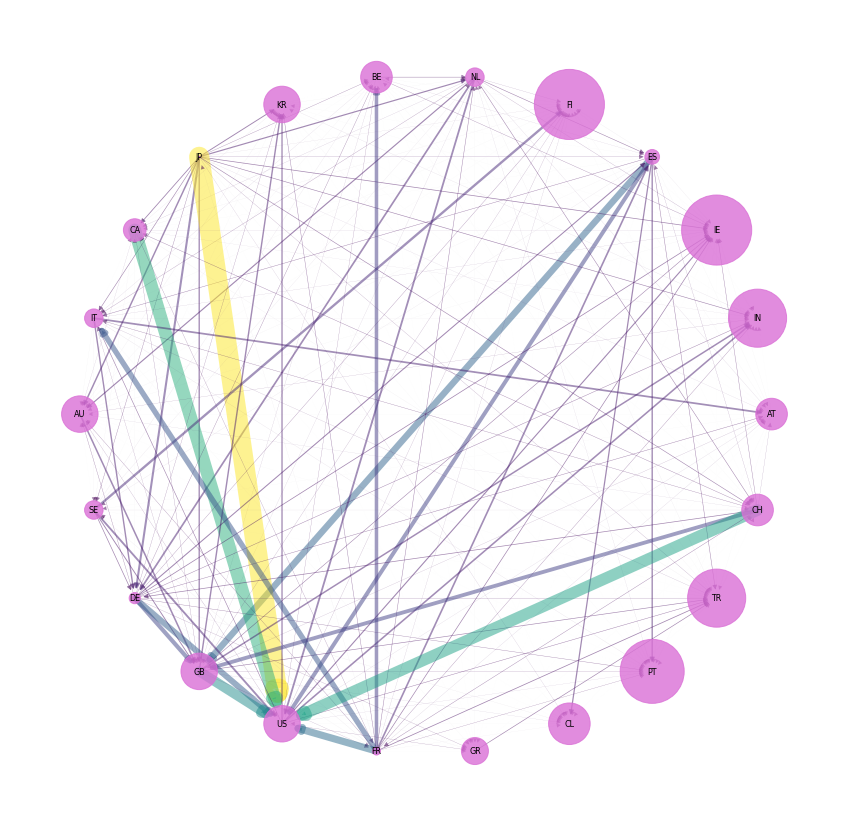

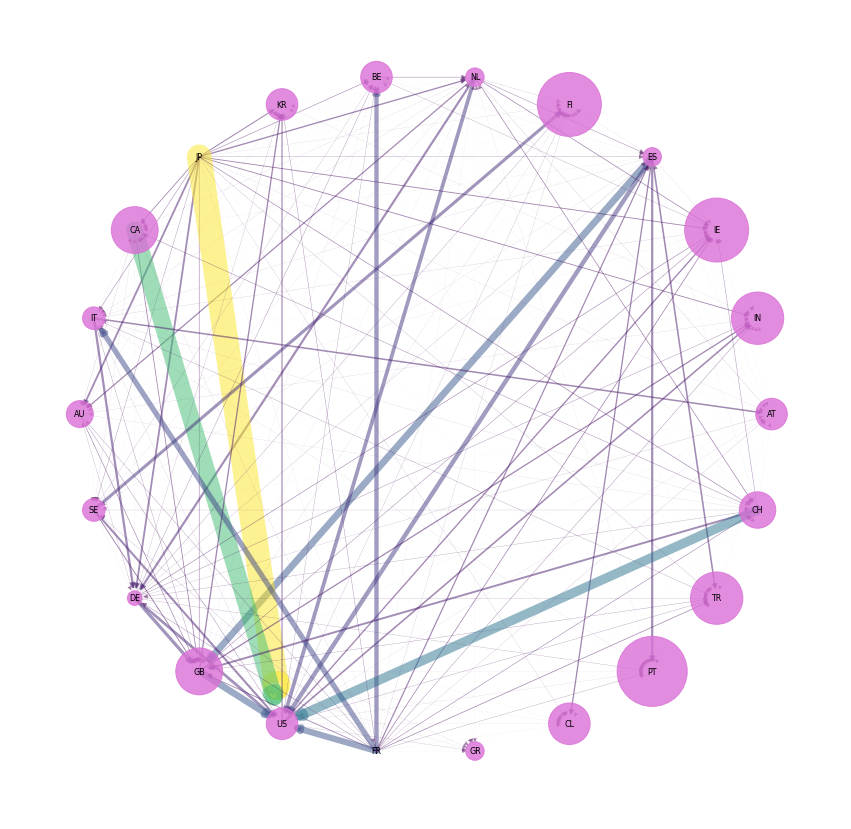

In [137]:
positions = []
G = []
for k in range(0, len(date), 10) :
    d = date[k]
   
    if k == 10:
        G1, positions = draw_graph(str(d), [])
        G.append(G1)
    else :
        G1, positions = draw_graph(str(d), positions)
        G.append(G1)
Graphs = G.copy()

We can see that during the financial crisis, confidence in the United States has been greatly mitigated. The imbalance with other countries is less. We can also notice that countries are more inclined to invest in different countries: one should not put all one's eggs in the same basket.

Now let's look at the evolution of the communities.

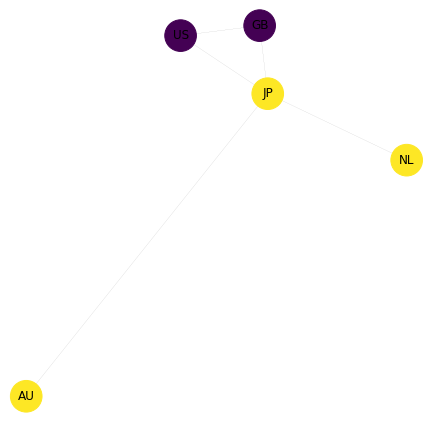

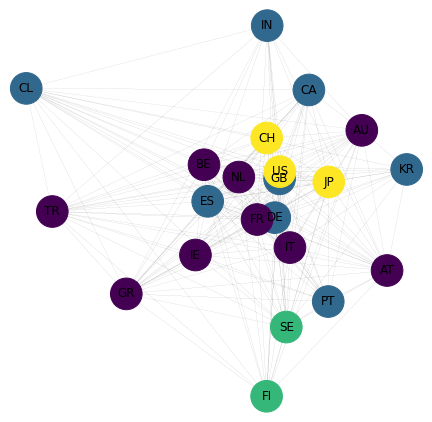

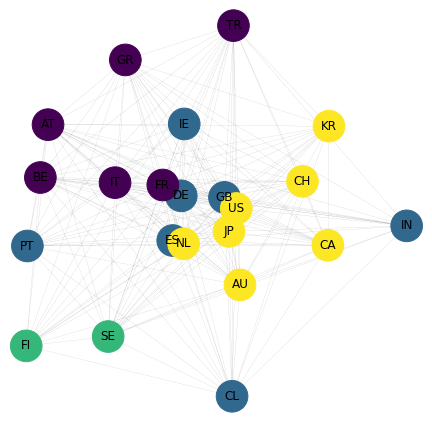

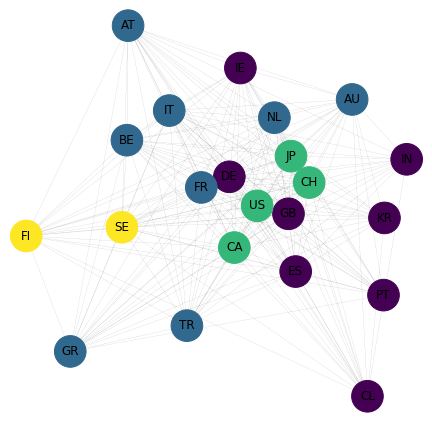

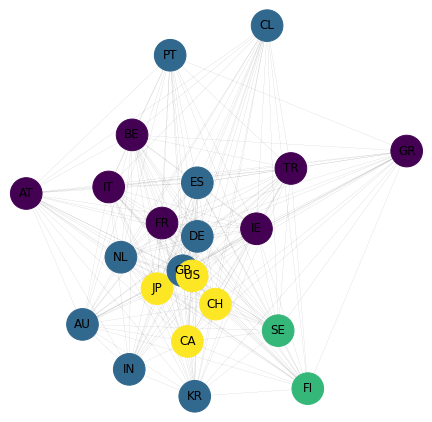

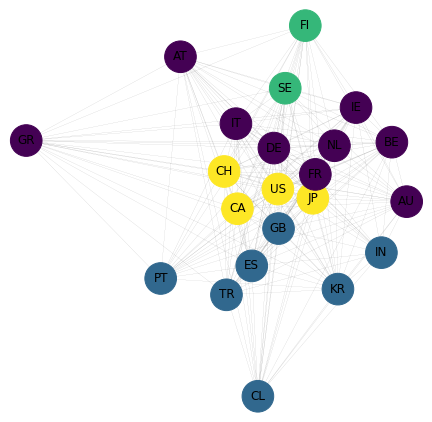

In [139]:
for i in range (len(Graphs)):
    G = nx.Graph(Graphs[i])
    part = community.best_partition(G)
    values = [part.get(node) for node in G.nodes()]

    fig, ax = plt.subplots(1, 1, figsize=(7.5, 7.5), clear = True)
    nx.draw_spring(G, node_color = values, node_size=1000, width = 0.05, with_labels=True)


We do not see any major redistribution in communities despite the financial crisis.

Now let's see if the evolution actually corresponds to the previous visualizations.

In [146]:
relations = np.array(financial_data[['from_id', 'to_id']])
relations

array([['AU', 'JP'],
       ['GB', 'JP'],
       ['GB', 'US'],
       ...,
       ['US', 'PT'],
       ['US', 'SE'],
       ['US', 'TR']], dtype=object)

In [147]:
financial_data['couple']=financial_data[['from_id', 'to_id']].apply(lambda row : (row['from_id'], row['to_id']), axis =1)
net = financial_data.drop(financial_data[financial_data['net_id']==date[0]].index, axis = 0)
net.head()

net_id from_id to_id  value    couple
5  2005-03-31      AU    AT   4.99  (AU, AT)
6  2005-03-31      AU    BE  11.35  (AU, BE)
7  2005-03-31      AU    CA  18.84  (AU, CA)
8  2005-03-31      AU    CH  19.74  (AU, CH)
9  2005-03-31      AU    CL   0.79  (AU, CL)

In [148]:
net2= net.drop(columns = 'couple')

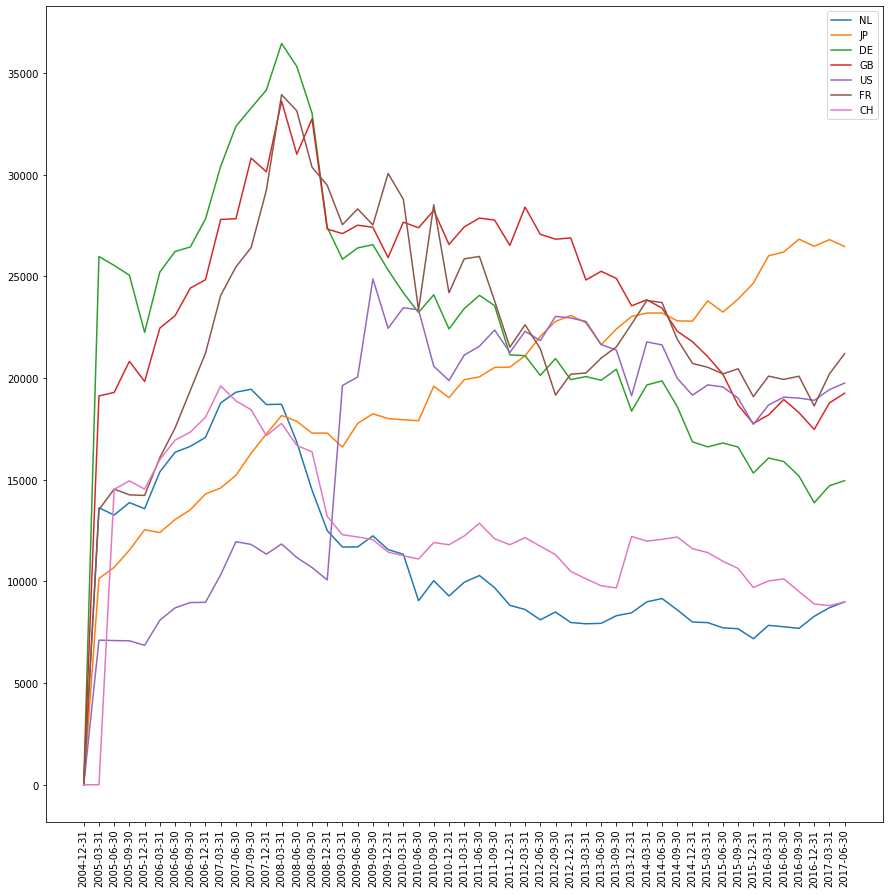

In [149]:
net3= net2.groupby(['from_id', 'net_id']).sum()
fig, ax = plt.subplots(1, 1, figsize=(15, 15), clear = True)
for x in set(net['from_id']):
    v = []
    if sum(net3.loc[x]['value']) > 500000:
        for i in date :

            if (x,i) in net3.index :
                v.append(net3.loc[(x, i)])
            else :
                v.append(0)
        plt.plot(date, v, label = x)
ax.legend()
plt.xticks(rotation=90)
plt.show()

Except US and Japan, all the other countries are reduced their exposure to other countries.

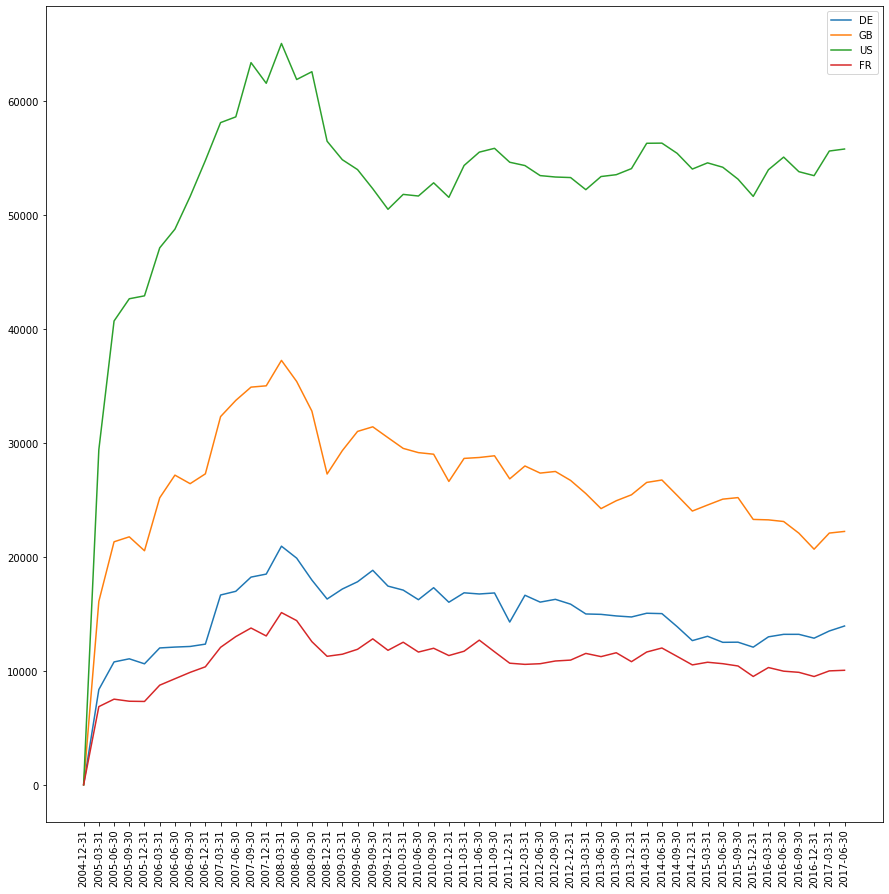

In [150]:
net3= net2.groupby(['to_id', 'net_id']).sum()
fig, ax = plt.subplots(1, 1, figsize=(15, 15), clear = True)
for x in set(net['to_id']):
    v = []
    if sum(net3.loc[x]['value']) > 500000:
        for i in date :
            if (x,i) in net3.index :
                v.append(net3.loc[(x, i)])
            else :
                v.append(0)
        plt.plot(date, v, label = x)
ax.legend()
plt.xticks(rotation=90)
plt.show()

And the 5 biggest countries are receiving less investment from other countries than before the crisis.